<a href="https://colab.research.google.com/github/jayaramanp/Computational_Psych_class/blob/main/lab1_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises

As you work on these, you may re-use or modify any of the code above. You are welcome to work in groups, though each student should turn in an individual notebook with answers by uploading to this [Google Drive folder](https://drive.google.com/drive/folders/1Tf99kycwrvAFJ_D7stayd8RkrWOXEds1).  

1. **In the previous simulation, we found that as we increase epsilon, that is, as agents become more exploratory, performance always increases. Do you think this will be the case for ranges of epsilon in which the agent almost always explores? Why or why not? Modify the simulation script above to verify your intuition. If you found that the answer is no, at what value of epsilon do we start noticing diminishing returns of exploration?**

2. **In lecture, we learned that another way to encourage exploration is by allowing agents to start with optimistic initial values. Check that this is the case by comparing the performance of a wildly optimistic agent that starts with $Q_t = 5$ and greedily selects actions, to that of a realistic agent which explores randomly with probability $ϵ = 0.1$ (hint, see plot from lecture).** 

3. **Modify the agent's policy to add uncertainty-driven exploration using the UCB algorithm from lecture. How does the agent's performance change as a function of the $c$ parameter?** 

4. **Modify the Environment class to implement the 4-armed bandit task described in [Addicott et al. (2017)](https://www.nature.com/articles/npp2017108). Confirm by visualizing the reward structure.**



# Lab Homework Responses

1. **In the previous simulation, we found that as we increase epsilon, that is, as agents become more exploratory, performance always increases. Do you think this will be the case for ranges of epsilon in which the agent almost always explores? Why or why not? Modify the simulation script above to verify your intuition.**

  **If you found that the answer is no, at what value of epsilon do we start noticing diminishing returns of exploration?**

### Answer1.
When the epsilon always explores, we see epsilon in increasing values. When we increase epsilon to really large numbers i.e. 0.4 -> 0.9, we see that the agent perfors optimally 60% of the time (epsilon = 0.4) which eventually goes down to only being greedy (optimal action) 10% of the time (at epsilon 90%). But then, if the agent always explores, then the agent exploits the greedy option very rarely and hence is unable to maximize rewards as epsilon increases. This can be seen from the plots where the higher values of epsilon, mostly above 0.3, the lower the plateau reached in the Average Reward plot. However, increasing exploration seems to use fewer steps to maximize its rewards. This can be seen in epsilon values of 0.1 and lower.

---


The cell below imports some necessary modules:



In [ ]:
import numpy as np  
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

To define different components of our simulation, we will make use of [object oriented programming (OOP)](https://realpython.com/python3-object-oriented-programming/). OOP is helpful because it lets us define general classes we can reuse across different simulations to create new instances of each component (e.g. different instances of an agent, environment, etc).  

# We start by defining the environment class:


In [ ]:
class Environment(object):
  
  """Class for the multiarmed bandit environment.

  Parameters
  ----------
  k : int
      Number of arms.
  mu : array, float, shape(k, )
      Mean for each arm.
  sigma : array, float, shape(k, )
      Standard deviation for each arm. 

  """

  def __init__(self, k, mu, sigma):

    """Constructor for the Environment class
    This function runs every time we create an instance of the class Environment
    To learn more about how constructors work: https://www.udacity.com/blog/2021/11/__init__-in-python-an-overview.html"""

    # "self" is just a convention that binds the attributes and methods of a class with the arguments of a given instance

    self.k = k          # number of arms
    self.mu = mu        # mean of reward distribution for each arm
    self.sigma = sigma  # standard deviation of reward distribution for each arm
    self.t = 0          # initialize timestep
    
    if self.mu.shape[0] is not k:
      raise Warning("Mean vector shape does not match number of arms")

    if self.sigma.shape[0] is not k:
      raise Warning("Sigma vector shape does not match number of arms")

  def visualize(self, style):

    # this method lets us visualize the structure of the environment
    # in the multiarmed bandit case, this consists of the reward distribution for each arm 

    # visualize as Gaussian densities
    if style == 1:
      
      x = np.arange(-5, 5, 0.001)

      for i in np.arange(self.k):
        plt.plot(x, norm.pdf(x, self.mu[i], self.sigma[i]), label='μ: ' + str(self.mu[i]) + ', σ: ' + str(self.sigma[i]))

      plt.legend()
      plt.xlabel('Reward distribution')
      plt.ylabel('Density')

    # draw many samples from each distribution and plot histograms
    if style == 2: 

      # initialize output list 
      bandit = []   # which bandit we're drawing from
      samples = []  # samples we drew

      # iterate over each bandit
      for i in np.arange(self.k):
        
        n_samples = 1000

        # create bandit index
        b = list(np.ones((n_samples, )) * (i+1))

        # draw samples
        s = list(np.random.normal(self.mu[i], self.sigma[i], n_samples))
  
        # add to lists  
        bandit = bandit + b
        samples = samples + s

      # create pandas dataframe from dictionary
      # background on dictionaries: https://www.w3schools.com/python/python_dictionaries.asp
      # background on dataframes: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html 
      df = pd.DataFrame({'bandit': list(map(int, bandit)), 
                         'samples': samples})
      
      # use seaborn to plot distributions
      # background on seaborn: https://seaborn.pydata.org/index.html
      sns.violinplot(data=df, x="bandit", y="samples")
      
      plt.xlabel('Action')
      plt.ylabel('Reward distribution')

  def step(self, action):

    # the step method takes as input an action and changes the environment
    # in the bandit case, the environment responds with a reward

     # draw reward
    reward = np.random.normal(self.mu[action-1], self.sigma[action-1], 1)[0]
    #### PJ question - why action-1? why is reward distribution for the previous action?does action get incremented before step?


    # increment timestep
    self.t = self.t + 1

    # comment the next line in if you want to print the time step
    # print('timestep: ' + str(self.t))

    return reward

# Let's test our environment...

In [ ]:
# Initialize a 10-armed bandit where each arm has an increasing mean and standard deviation of 1
n_arms = 10
means = np.arange(n_arms)-5
sds = np.ones((n_arms,))

# This line creates an instance of the class we defined above with some attributes
env = Environment(n_arms, means, sds)

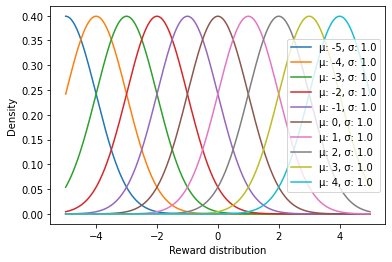

In [ ]:
# Visualize
# Note how now we can access the method inside the class for this specific instance
env.visualize(1)

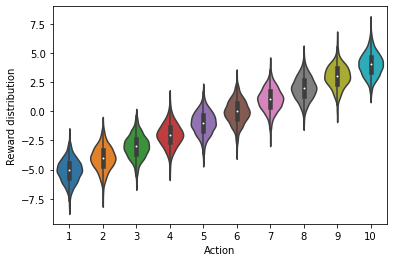

In [ ]:
env.visualize(2)

In [ ]:
# Draw rewards for each action
for a in np.arange(10):
  action = a + 1
  print('took action ' + str(action))
  print('reward: ' + str(env.step(action)))

took action 1
reward: -4.5917955510518516
took action 2
reward: -4.969957823573957
took action 3
reward: -2.755625480176552
took action 4
reward: -1.516380673068997
took action 5
reward: -1.237924141592699
took action 6
reward: 0.290755237628175
took action 7
reward: 1.9533188873844938
took action 8
reward: 2.4038064002941932
took action 9
reward: 1.8657696566847166
took action 10
reward: 4.18195243792772


# Next, we define the agent:

In RL, it is useful to separate the environment from the agent. In the next class, we will see how we can expand our definition of the environment, and model how an agent interacts with it via the actions it takes.

In [ ]:
class Agent(object):
  """Class for the e-greedy agent.

  Parameters
  ----------
  epsilon : float, range (0, 1)
      Epsilon probability of exploration.

  """

  def __init__(self, env, epsilon, q_init=False):

    # initialize action space. R is i-indexed, Matlab is 1-indexed. 
    #Python is 0-indexed hence add 1. set of numbers 1-10. give me numbers 0-9 and add 1 so they are 1-10.
    self.action_space = np.arange(env.k) + 1

    # initialize parameters
    self.eps = epsilon
    
    # initialize Q-values and action counters
    if q_init: # check if initial q-values were provided 
      self.q = q_init     
    else:   
      self.q = np.zeros((env.k, ))
    
    # initialize action counter. how many times to take each action.
    self.action_counter = np.zeros((env.k, ))  

  def policy(self):
    ## WHT does this agent do?
    # for now, you can think of the policy method as encoding how 
    # an agent selects actions.
    # in the epsilon-greedy case, the agent has an internal representation
    # of the value of each action. its policy is to pick the action with the 
    # highest value with probability 1-epsilon and explore a random action with 
    # probabilty epsilon.  

    # generate random number between 0 and 1.
    # this draws from a uniform distribution, so we have an equal probability
    # of generating any real number between 0 and 1.
    p = np.random.rand()

    # select action
    if (p < self.eps): # is the number we drew is smaller than epsilon? 
      action = np.random.choice(env.k)+1 # random action
    else: 
      action = np.argmax(self.q)+1 # action with highest q-value     
    
    return action

  def update(self, action, reward, verbose=False):

    # the update method encodes how the agent learns from its actions. 
    # it takes as input the action and reward.
  
    # update action counter
    self.action_counter[action-1] = self.action_counter[action-1] + 1

    # update value of selected action in proportion to the difference between the 
    # current reward and the previous value, times a step size 
    # equal to the inverse of how many times the agent selected that action in the past.
    # in other words, the step size will be smaller the more we select that action. 
    self.q[action-1] = self.q[action-1] + 1/self.action_counter[action-1] * (reward - self.q[action-1])

    if verbose == True: 
      print(self.q)

# We can now reproduce the simulation results:

We saw in lecture today our first example of a simulation. Simulating behavior from a computational model is often the first step of using that model to ask a new scientific question. From [Wilson and Collins (2019)](https://elifesciences.org/articles/49547): "simulation involves running the model with particular parameter settings to generate ‘fake’ behavioral data. These simulated data can then be analyzed in much the same way as one would analyze real data, to make precise, falsifiable predictions about qualitative and quantitative patterns in the data. Simulation is a way to make theoretical predictions more precise and testable."

In [ ]:
def run_simulation(n_timesteps, params, verbose=False):

  """Function for running one simulation of the bandit problem.
  It specifies how the environment and agent interact over the course
  of multiple timesteps.

  Parameters
  ----------

  n_timesteps: int
      How many timesteps to run the simulation for

  params : dictionary containing parameters of the simulation 

      Environment parameters
      n_arms: int
        Number of arms.
      means: array, float, shape(n_arms, )
        Means for each arm.
      sds: array, float, shape(n_arms, )
        Standard deviations for each arm.
      
      Agent parameters
      epsilon: float, range (0, 1)
        Epsilon probability of exploration.

  verbose: flag for printing some output

  Returns
  ----------

  sim_output: dictionary containing simulation output

      actions: array, int, shape(n_timesteps, )
        Action that the agent took on each timestep.

      rewards: array, float, shape(n_timesteps, )
        Rewards that the agent received on each timestep.

      optimal_action: array, boolean, shape(n_timestep, )
        Indicator vector that tells us if the agent took the best possible action.
  """

  # make environment (10-arm testbed with varying means and same standard deviation)
  env = Environment(params['n_arms'], params['means'], params['sds'])

  # initialize agent 
  agent = Agent(env, params['epsilon'])

  # initialize output lists
  A = [] # action taken at each timestep
  R = [] # rewards on each timestep
  OA = [] # was the optimal action taken at each timestep? 

  # loop for given number of timesteps
  for t in np.arange(n_timesteps):

    # agent selects action
    action = agent.policy()

    # environment responds with a reward
    reward = env.step(action)

    # record action and reward
    A.append(action)
    R.append(reward)

    # record whether the agent took the optimal action
    optimal_action = np.argmax(params['means'])+1
    OA.append(action == optimal_action)
    
    if verbose: 
      print('action: ' + str(action))
      print('reward: ' + str(reward))

    agent.update(action, reward, verbose=False)

  # record output in dictionary
  sim_output = {
      'timestep': np.arange(n_timesteps)+1,
      'actions': np.array(A),
      'rewards': np.array(R),
      'optimal_action': np.array(OA)
  }

  return env, agent, sim_output

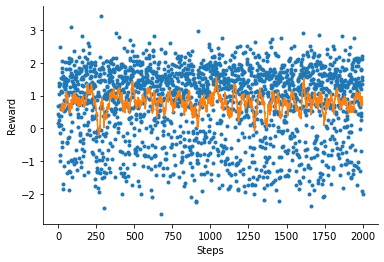

In [ ]:
# Run simulation once
n_timesteps = 2000
params = {
    'n_arms': 10,
    'means': np.array([0.5, -0.9, 1.5, 0.7, 1.3, -1.5, -0.3, -1, 0.9, -0.7]),
    'sds': np.ones((n_arms,)) * 0.5,
    'epsilon': 0.5 
}

sim_env, sim_agent, sim_output = run_simulation(n_timesteps, params)
df = pd.DataFrame(sim_output['rewards'])

# Plot reward at each timestep
plt.plot(np.arange(n_timesteps), sim_output['rewards'], '.')
plt.plot(np.arange(n_timesteps), df.rolling(20).mean(), '-')
plt.xlabel('Steps')
plt.ylabel('Reward')
sns.despine();

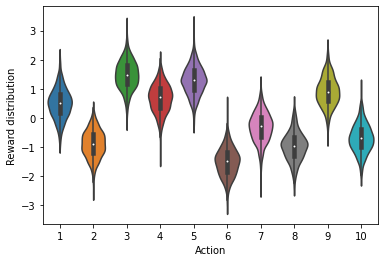

In [ ]:
# Check environment
sim_env.visualize(2)

The goal of the simulation in lecture was to examine how the performance of the epsilon-greedy agent changes as a function of parameter epsilon. Let's reproduce that experiment below. 

In [ ]:
# Run simulation many times for different values of epsilon
n_runs = 2000

# Initialize output list
D = []
  
for e in [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8, 0.9]:

  print('epsilon = '  + str(e))

  for r in np.arange(n_runs): 

    #print('simulation #: ' + str(r+1))

    n_timesteps = 1000
    params = {
      'n_arms': 10,
      'means': np.array([0.5, -0.9, 1.5, 0.7, 1.3, -1.5, -0.3, -1, 0.9, -0.7]),
      'sds': np.ones((n_arms,)) * 0.5,
      'epsilon': e 
    }

    _, _, sim_output = run_simulation(n_timesteps, params)

    # convert to dataframe and append to list
    d = pd.DataFrame(sim_output)
    d.insert(0, 'run', r+1)
    d.insert(1, 'epsilon', e)
    D.append(d)

data = pd.concat(D, ignore_index=True)

epsilon = 0.01
epsilon = 0.05
epsilon = 0.1
epsilon = 0.15
epsilon = 0.2
epsilon = 0.3
epsilon = 0.4
epsilon = 0.6
epsilon = 0.9


In [ ]:
# Examine output
data.head()

,run,epsilon,timestep,actions,rewards,optimal_action
0,1,0.01,1,1,-0.107972,False
1,1,0.01,2,2,-1.570952,False
2,1,0.01,3,3,1.527172,True
3,1,0.01,4,3,1.328201,True
4,1,0.01,5,3,1.213701,True


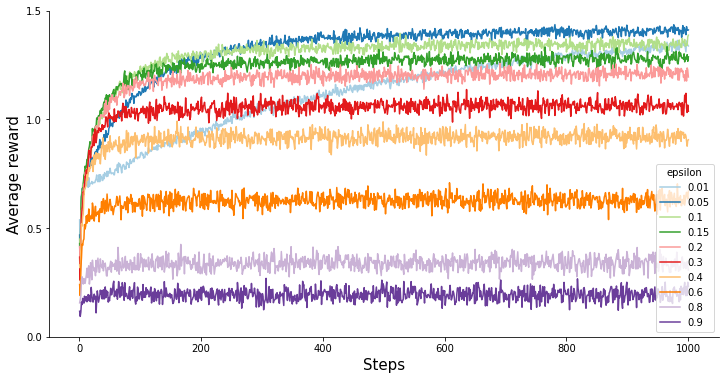

In [ ]:
# Plot average reward across different runs, for each value of epsilon
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.lineplot(data=data, x="timestep", y="rewards", hue='epsilon', ci=None, ax=ax, palette='Paired')
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlabel('Steps', fontsize=15)
ax.set_ylabel('Average reward', fontsize=15)
sns.despine();

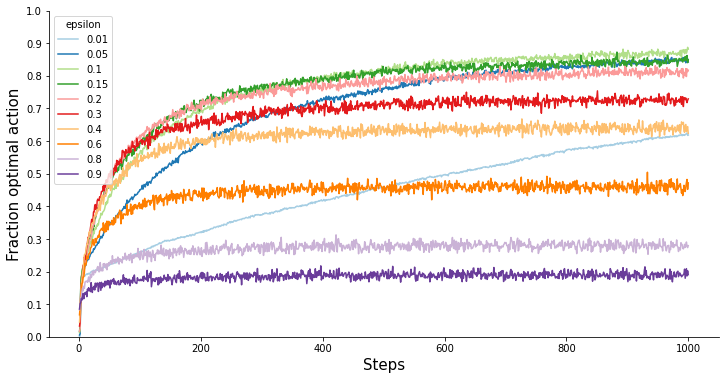

In [ ]:
# Plot fraction correct across different runs, for each value of epsilon 
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.lineplot(data=data, x="timestep", y="optimal_action", hue='epsilon', ci=None, ax=ax, palette='Paired')
ax.set_ylim([0, 1])
ax.set_yticks(np.arange(11)/10)
ax.set_xlabel('Steps', fontsize=15)
ax.set_ylabel('Fraction optimal action', fontsize=15)
sns.despine();

# Lab Homework Responses

2. **In lecture, we learned that another way to encourage exploration is by allowing agents to start with optimistic initial values. Check that this is the case by comparing the performance of a wildly optimistic agent that starts with $Q_t = 5$ and greedily selects actions, to that of a realistic agent which explores randomly with probability $ϵ = 0.1$ (hint, see plot from lecture).** 

### Answer2.
For this question, we modify the Agent to allow it to accept values for q_init. the modified Agent is **QAgent** 
We then modify run_simulation to **run_simulation_withQ** to accept *q_init* as a parameter and then we loop through the runs for *q_init* values from 0 to 5 such that at q=5 we use very greedy epsilon value (i,e. *e=0*) and at lower values of q, epsilon is 0.1

---



In [ ]:
class QAgent(object):
  """Class for the e-greedy agent.

  Parameters
  ----------
  epsilon : float, range (0, 1)
      Epsilon probability of exploration.

  """

  def __init__(self, env, epsilon, q_init=True):

    # initialize action space. R is i-indexed, Matlab is 1-indexed. 
    #Python is 0-indexed hence add 1. set of numbers 1-10. give me numbers 0-9 and add 1 so they are 1-10.
    self.action_space = np.arange(env.k) + 1

    # initialize parameters
    self.eps = epsilon
    
    # initialize Q-values and action counters
    if q_init: # check if initial q-values were provided 
      #self.q = q_init     
      self.q = np.ones((env.k, ))*q_init
    else:   
      self.q = np.zeros((env.k, ))
    
    # initialize action counter. how many times to take each action.
    self.action_counter = np.zeros((env.k, ))  

  def policy(self):
    ## WHT does this agent do?
    # for now, you can think of the policy method as encoding how 
    # an agent selects actions.
    # in the epsilon-greedy case, the agent has an internal representation
    # of the value of each action. its policy is to pick the action with the 
    # highest value with probability 1-epsilon and explore a random action with 
    # probabilty epsilon.  

    # generate random number between 0 and 1.
    # this draws from a uniform distribution, so we have an equal probability
    # of generating any real number between 0 and 1.
    p = np.random.rand()

    # select action
    if (p < self.eps): # is the number we drew is smaller than epsilon? 
      action = np.random.choice(env.k)+1 # random action
    else: 
      action = np.argmax(self.q)+1 # action with highest q-value     
    
    return action

  def update(self, action, reward, verbose=False):

    # the update method encodes how the agent learns from its actions. 
    # it takes as input the action and reward.
  
    # update action counter
    self.action_counter[action-1] = self.action_counter[action-1] + 1

    # update value of selected action in proportion to the difference between the 
    # current reward and the previous value, times a step size 
    # equal to the inverse of how many times the agent selected that action in the past.
    # in other words, the step size will be smaller the more we select that action. 
    self.q[action-1] = self.q[action-1] + 1/self.action_counter[action-1] * (reward - self.q[action-1])

    if verbose == True: 
      print(self.q)

In [ ]:
def run_simulation_withQ(n_timesteps, params, verbose=False):

  """Function for running one simulation of the bandit problem.
  It specifies how the environment and agent interact over the course
  of multiple timesteps.

  Parameters
  ----------

  n_timesteps: int
      How many timesteps to run the simulation for

  params : dictionary containing parameters of the simulation 

      Environment parameters
      n_arms: int
        Number of arms.
      means: array, float, shape(n_arms, )
        Means for each arm.
      sds: array, float, shape(n_arms, )
        Standard deviations for each arm.
      
      Agent parameters
      epsilon: float, range (0, 1)
        Epsilon probability of exploration.

  verbose: flag for printing some output

  Returns
  ----------

  sim_output: dictionary containing simulation output

      actions: array, int, shape(n_timesteps, )
        Action that the agent took on each timestep.

      rewards: array, float, shape(n_timesteps, )
        Rewards that the agent received on each timestep.

      optimal_action: array, boolean, shape(n_timestep, )
        Indicator vector that tells us if the agent took the best possible action.
  """

  # make environment (10-arm testbed with varying means and same standard deviation)
  env_withQ = Environment(params['n_arms'], params['means'], params['sds'])

  # initialize agent 
  agent_withQ = QAgent(env, params['epsilon'], params['q_init'])

  # initialize output lists
  A = [] # action taken at each timestep
  R = [] # rewards on each timestep
  OA = [] # was the optimal action taken at each timestep? 

  # loop for given number of timesteps
  for t in np.arange(n_timesteps):

    # agent selects action
    action = agent_withQ.policy()

    # environment responds with a reward
    reward = env_withQ.step(action)

    # record action and reward
    A.append(action)
    R.append(reward)

    # record whether the agent took the optimal action
    optimal_action = np.argmax(params['means'])+1
    OA.append(action == optimal_action)
    
    if verbose: 
      print('action: ' + str(action))
      print('reward: ' + str(reward))

    agent_withQ.update(action, reward, verbose=False)

  # record output in dictionary
  sim_output_withQ = {
      'timestep': np.arange(n_timesteps)+1,
      'actions': np.array(A),
      'rewards': np.array(R),
      'optimal_action': np.array(OA)
  }

  return env_withQ, agent_withQ, sim_output_withQ

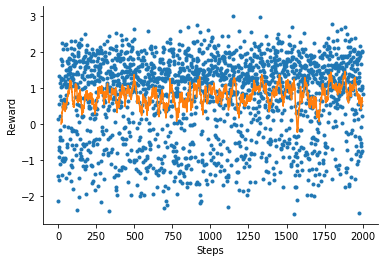

In [ ]:
# Run simulation once
n_timesteps_forQ = 2000
Qparams = {
    'n_arms': 10,
    'means': np.array([0.5, -0.9, 1.5, 0.7, 1.3, -1.5, -0.3, -1, 0.9, -0.7]),
    'sds': np.ones((n_arms,)) * 0.5,
    'epsilon': 0.5,
    'q_init': 5

}

sim_envQ, sim_agentQ, sim_outputQ = run_simulation_withQ(n_timesteps_forQ, Qparams)
dfQ = pd.DataFrame(sim_outputQ['rewards'])

# Plot reward at each timestep
plt.plot(np.arange(n_timesteps_forQ), sim_outputQ['rewards'], '.')
plt.plot(np.arange(n_timesteps_forQ), dfQ.rolling(20).mean(), '-')
plt.xlabel('Steps')
plt.ylabel('Reward')
sns.despine();

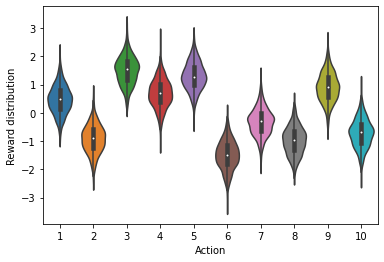

In [ ]:
# Check environment
sim_envQ.visualize(2)

In [26]:
# Run simulation many times for different values of epsilon
n_runsQ = 2000

# Initialize output list
DQ = []
  
for q in [0, 1, 2, 3, 4, 5]:

  if(q==5):
    e = 0
  else:
    e=0.1


  print('q value = ' + str(q) + ' and epsilon = '  + str(e))

  for r in np.arange(n_runsQ): 

    #print('simulation #: ' + str(r+1))

    n_timestepsQ = 500
    paramsQ = {
      'n_arms': 10,
      'means': np.array([0.5, -0.9, 1.5, 0.7, 1.3, -1.5, -0.3, -1, 0.9, -0.7]),
      'sds': np.ones((n_arms,)) * 0.5,
      'epsilon': e,
      'q_init': q 
    }

    _, _, sim_outputQ = run_simulation_withQ(n_timestepsQ, paramsQ)

    # convert to dataframe and append to list
    d = pd.DataFrame(sim_outputQ)
    d.insert(0, 'run', r+1)
    d.insert(1, 'epsilon', e)
    d.insert(2, 'q_init', q)
    DQ.append(d)

dataQ = pd.concat(DQ, ignore_index=True)

q value = 0 and epsilon = 0.1
q value = 1 and epsilon = 0.1
q value = 2 and epsilon = 0.1
q value = 3 and epsilon = 0.1
q value = 4 and epsilon = 0.1
q value = 5 and epsilon = 0


In [27]:
# Examine output
dataQ.head()

,run,epsilon,q_init,timestep,actions,rewards,optimal_action
0,1,0.1,0,1,1,0.103169,False
1,1,0.1,0,2,1,0.530283,False
2,1,0.1,0,3,7,-0.622432,False
3,1,0.1,0,4,1,0.532914,False
4,1,0.1,0,5,1,-0.077162,False


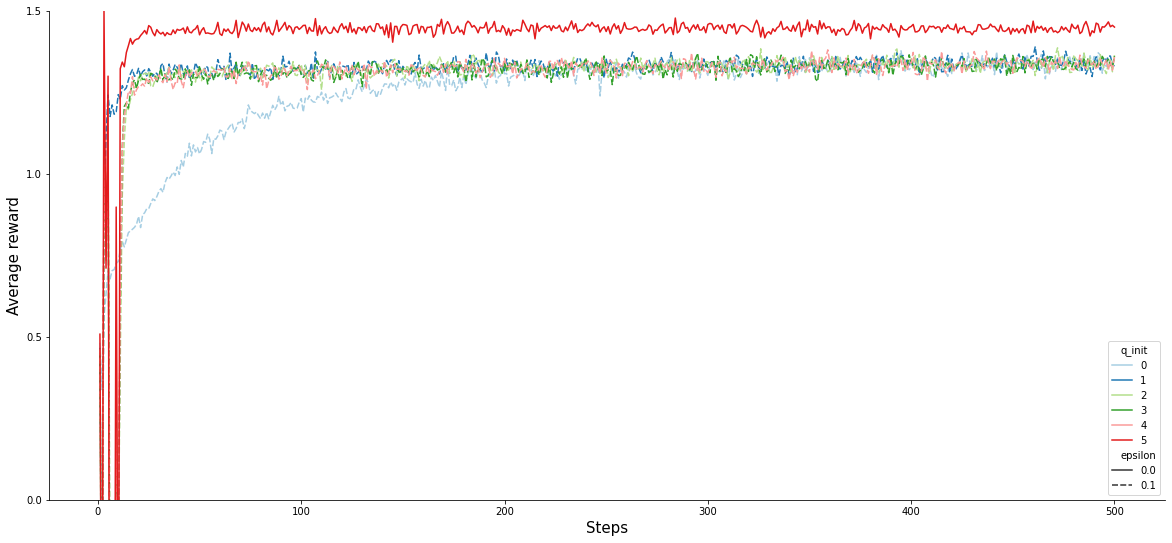

In [34]:
# Plot average reward across different runs, for each value of epsilon
figQ, axQ = plt.subplots(1, 1, figsize=(20,9))
sns.lineplot(data=dataQ, x="timestep", y="rewards", hue='q_init', style='epsilon', ci=None, ax=axQ, palette='Paired')
axQ.set_ylim([0, 1.5])
axQ.set_yticks([0, 0.5, 1, 1.5])
axQ.set_xlabel('Steps', fontsize=15)
axQ.set_ylabel('Average reward', fontsize=15)
sns.despine();

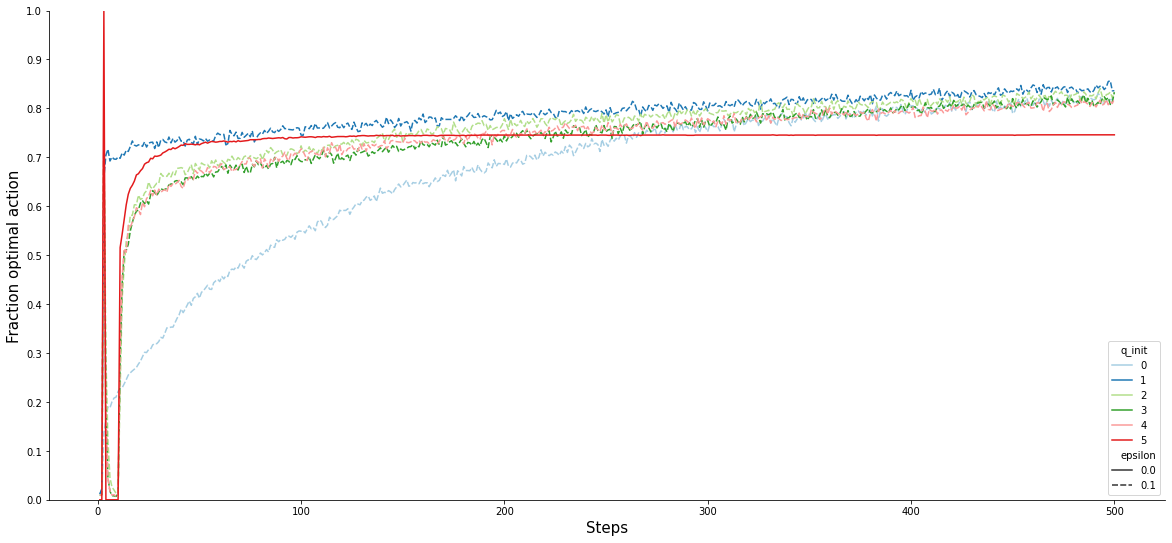

In [35]:
# Plot fraction correct across different runs, for each value of epsilon 
figQ, axQ = plt.subplots(1, 1, figsize=(20,9))
sns.lineplot(data=dataQ, x="timestep", y="optimal_action", hue='q_init', style='epsilon', ci=None, ax=axQ, palette='Paired')
axQ.set_ylim([0, 1])
axQ.set_yticks(np.arange(11)/10)
axQ.set_xlabel('Steps', fontsize=15)
axQ.set_ylabel('Fraction optimal action', fontsize=15)
sns.despine();

# Lab Homework Responses

3. **Modify the agent's policy to add uncertainty-driven exploration using the UCB algorithm from lecture. How does the agent's performance change as a function of the $c$ parameter?** 

### Answer3.
Uncertainty-driven exploration using Upper Confidence Bound (UCB) algorthm can be mathematically documented as: 

$Action (time__t) = argmax(Qa(t) + c * sqrt(ln (t) / action_counter(t))$

The uncertainty parameter is the second half of this equation which could be called uncertainty_variable:

$ uncertainty__var = c * sqrt(ln (t) / action_counter(t))$

where c is perceived as a constant. In different scenarios:
when c=0:
$uncertainty__var = 0$
and 
$Action (time__t) = argmax(Qa(t)$

when C >=1 then uncertainty gets modeled in and results in the value of action(t) to be lower due to the inclusion of uncertainty. 

At lower time t, the exploration is more since uncertainty is more, however, as time t increases, the exploration reduces and the dependency on the $uncertainty__var$ reduces. 


---


# Lab Homework Responses

4. **Modify the Environment class to implement the 4-armed bandit task described in [Addicott et al. (2017)](https://www.nature.com/articles/npp2017108). Confirm by visualizing the reward structure.**

### Answer4 ###

Based on the paper Addicott et. al 2017 and the corresponding paper it cites, Daw et. al 2006, we will have to modify the following parameters in the Environment

- n_arms = 4
- reward = np.random.random(size=(100,4))
- step = self.t + np.where(Uniform>0.5, 1, 6) ## (every 6 seconds it clears up) 
- action = 

_I havent tested the Environment out!_

---


In [ ]:
class Environment_4arms(object):
  
  """Class for the multiarmed bandit environment.

  Parameters
  ----------
  k : int
      Number of arms.
  mu : array, float, shape(k, )
      Mean for each arm.
  sigma : array, float, shape(k, )
      Standard deviation for each arm. 

  """

  def __init__(self, k, mu, sigma):

    """Constructor for the Environment class
    This function runs every time we create an instance of the class Environment
    To learn more about how constructors work: https://www.udacity.com/blog/2021/11/__init__-in-python-an-overview.html"""

    # "self" is just a convention that binds the attributes and methods of a class with the arguments of a given instance

    self.k = k          # number of arms
    self.mu = mu        # mean of reward distribution for each arm
    self.sigma = sigma  # standard deviation of reward distribution for each arm
    self.t = 0          # initialize timestep
    
    if self.mu.shape[0] is not k:
      raise Warning("Mean vector shape does not match number of arms")

    if self.sigma.shape[0] is not k:
      raise Warning("Sigma vector shape does not match number of arms")

  def visualize(self, style):

    # this method lets us visualize the structure of the environment
    # in the multiarmed bandit case, this consists of the reward distribution for each arm 

    # visualize as Gaussian densities
    if style == 1:
      
      x = np.arange(-5, 5, 0.001)

      for i in np.arange(self.k):
        plt.plot(x, norm.pdf(x, self.mu[i], self.sigma[i]), label='μ: ' + str(self.mu[i]) + ', σ: ' + str(self.sigma[i]))

      plt.legend()
      plt.xlabel('Reward distribution')
      plt.ylabel('Density')

    # draw many samples from each distribution and plot histograms
    if style == 2: 

      # initialize output list 
      bandit = []   # which bandit we're drawing from
      samples = []  # samples we drew

      # iterate over each bandit
      for i in np.arange(self.k):
        
        n_samples = 1000

        # create bandit index
        b = list(np.ones((n_samples, )) * (i+1))

        # draw samples
        s = list(np.random.normal(self.mu[i], self.sigma[i], n_samples))
  
        # add to lists  
        bandit = bandit + b
        samples = samples + s

      # create pandas dataframe from dictionary
      # background on dictionaries: https://www.w3schools.com/python/python_dictionaries.asp
      # background on dataframes: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html 
      df = pd.DataFrame({'bandit': list(map(int, bandit)), 
                         'samples': samples})
      
      # use seaborn to plot distributions
      # background on seaborn: https://seaborn.pydata.org/index.html
      sns.violinplot(data=df, x="bandit", y="samples")
      
      plt.xlabel('Action')
      plt.ylabel('Reward distribution')

  def step(self, action):

    # the step method takes as input an action and changes the environment
    # in the bandit case, the environment responds with a reward

     # draw reward
    reward = np.random.random(size=(100,4))[0]
    #### PJ question - why action-1? why is reward distribution for the previous action?does action get incremented before step?


    # increment timestep
    self.t = self.t + np.where(Uniform>0.5, 1, 6) 

    # comment the next line in if you want to print the time step
    # print('timestep: ' + str(self.t))

    return reward

In [ ]:
# Initialize a 10-armed bandit where each arm has an increasing mean and standard deviation of 1
n_arms = 4
means = np.arange(n_arms)-5
sds = np.ones((n_arms,))

# This line creates an instance of the class we defined above with some attributes
env = Environment(n_arms, means, sds)